
# Devoir KNN avec la base IRIS 

## Import des bibliothèques et des données 

In [2]:
#Import des bibliothèques 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import des données 
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Nettoyage stanrdardisation et normalisation des données 

In [5]:
print(iris.info())
print(iris.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.50000

Les données n'ont pas de case vides, elle sont en bonne forme et les colonnes sont homogènes pas besoin de normaliser ni de stanrdardiser les données 

**Il y a 3 types d'iris dans la base** 

In [13]:
iris['species'].drop_duplicates()

0      1
50     2
100    3
Name: species, dtype: int64

On donne un code numérique pour chaque type
1 = setosa
2 = versicolor
3 = viriginica

In [14]:
iris['species'].replace(['setosa','versicolor','virginica'],[1,2,3], inplace=True) # setosa = 1,'versicolor' = 2 ,'virginica = 3 
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


## Charger le modèle avec sklearn 

In [15]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

## Les target et features 

**On veut predire àpartir des données d'une fleur à quelle type d'iris elle appartient**

In [16]:
y = iris['species']
x = iris.drop('species', axis=1)

## Initialiser et entrainer le modèle

In [17]:
model.fit(x,y)
model.score(x,y) #précision attention la précision n'est pas l'accuracy 

0.9666666666666667

## Prediction 

In [21]:
def espece(model,sepal_length,sepal_width,petal_length,petal_width):
    x = np.array([sepal_length,sepal_width,petal_length,petal_width]).reshape(1,4)
    y_pred = model.predict(x)
    if y_pred == 1:
        print(y_pred,"setosa")
    elif y_pred == 2:
        print(y_pred,"versicolor")
    else:
        print(y_pred,"virginica")
espece(model,sepal_length=0.5,sepal_width=1,petal_length=5,petal_width=0.8) # appel: 

[2] versicolor


c:\Users\rymkm\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Choix du k optimal

**Il existe deux méthodes pour le choix du k optimal**

In [22]:
score_dic = {}
for i in range(1,10):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x,y)
    score = model.score(x,y)
    score_dic[i] = score
score_dic

{1: 1.0,
 2: 0.98,
 3: 0.96,
 4: 0.96,
 5: 0.9666666666666667,
 6: 0.9733333333333334,
 7: 0.9733333333333334,
 8: 0.98,
 9: 0.98}

In [23]:
#deuxième méthode 
score =[]
best_k = 1
best_score = 0

for k in range(best_k,10):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x,y)
    score.append(model.score(x,y))
    if best_score < model.score(x,y):
        best_k = k
        best_score = model.score(x,y)
print(best_k)

1


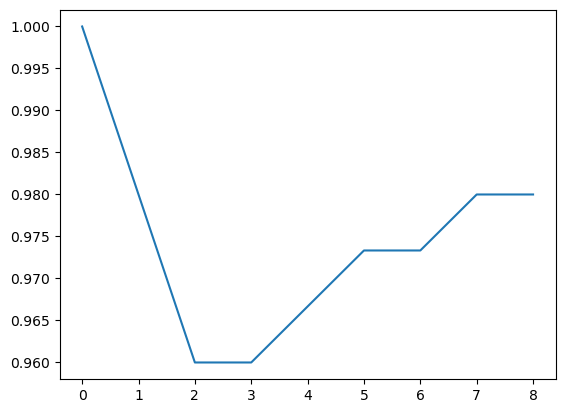

In [24]:
plt.plot(score)

**Les deux méthodes s'accordent à dire que le k optimal est 1** et le graphe le confirme 